In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy

from collections import Counter
import re
import gensim

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## EXPLORING THE DATA

In [2]:
df = pd.read_csv('../DATA/tweet_emotions.csv')

In [3]:
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [4]:
df.shape

(40000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [6]:
df.isnull()

,tweet_id,sentiment,content
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
39995,False,False,False
39996,False,False,False
39997,False,False,False
39998,False,False,False


In [7]:
df['preprocessed text'] = df['content'].apply(gensim.utils.simple_preprocess)
df

,tweet_id,sentiment,content,preprocessed text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[tiffanylue, know, was, listenin, to, bad, hab..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[layin, bed, with, headache, ughhhh, waitin, o..."
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[funeral, ceremony, gloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[wants, to, hang, out, with, friends, soon]"
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[dannycastillo, we, want, to, trade, with, som..."
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,[johnlloydtaylor]
39996,1753919001,love,Happy Mothers Day All my love,"[happy, mothers, day, all, my, love]"
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"[happy, mother, day, to, all, the, mommies, ou..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,"[niariley, wassup, beautiful, follow, me, peep..."


In [8]:
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [9]:
df['count'] = df['sentiment'].value_counts(normalize=True)

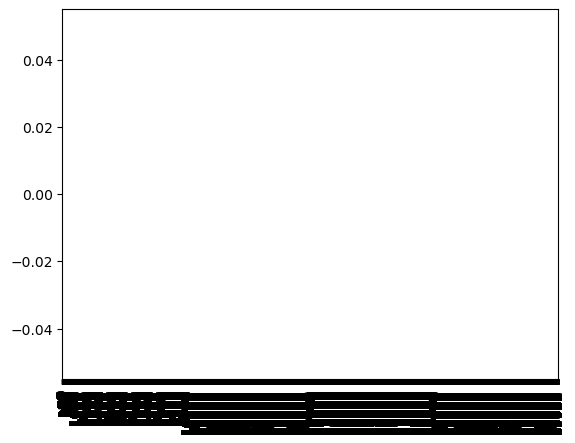

In [10]:
df['count'].plot(kind='bar')
plt.show()

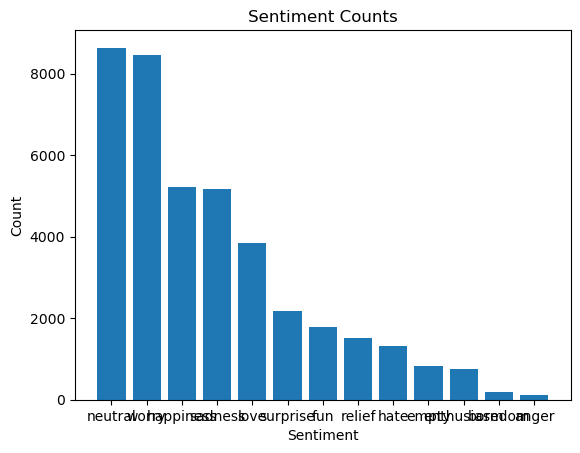

In [11]:
# Get emotion counts
emotion_counts = df['sentiment'].value_counts()

# Create a bar plot
plt.bar(emotion_counts.index, emotion_counts.values)
# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts')

# Show the plot
plt.show()

    We import the matplotlib.pyplot module.
    We use emotion_counts.index to get the sentiment labels and emotion_counts.values to get the corresponding counts.
    We add labels and a title to the plot.
    We use plt.show() to display the plot.

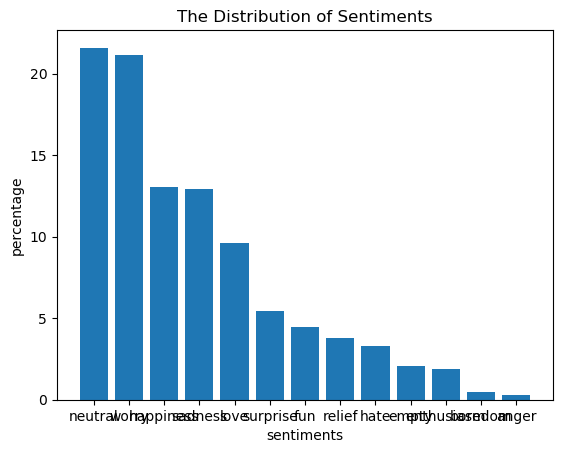

In [12]:
total_count = len(df['sentiment'])
emotion_percentages = (emotion_counts / total_count) * 100

plt.bar(emotion_percentages.index, emotion_percentages.values)

plt.xlabel('sentiments')
plt.ylabel('percentage')
plt.title('The Distribution of Sentiments')

plt.show()